# Introduction
For the Data Science Summer Trainee assignment in 2024, I have chosen to work with the orders_autumn dataset, focusing on predicting the order flow for the next day, and week. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Wrangling and Exploration
The dataset comprises 18,706 observations across 13 columns. The dataset presents a challenge with 277 missing values in the CLOUD_COVERAGE, TEMPERATURE, and WINDSPEED columns. To address this, a solution involves imputing these gaps with the mean values of their respective columns, ensuring a representative imputation.

The TIMESTAMP column is a pivotal feature, leveraged for extracting temporal insights. This column is used to extract day, month, week progression, time of day and day of the week information, unlocking the potential to unveil intricate patterns within the data.

This strategic approach serves a dual purpose – resolving missing data concerns and enabling aexploration of temporal dynamics. By employing mean imputation, we maintain the integrity of the dataset, while the TIMESTAMP transformations offer a foundation for comprehensive temporal analysis. This  strategy aims to enhance the dataset's quality and harness its full potential in revealing meaningful patterns for subsequent predictive modeling endeavors.

In [2]:
# Read orders_autumn
df  = pd.read_csv("orders_autumn_2020.csv", sep = ",");

# Inspection of the data
print("\nInformation about the dataframe:")
print(df.info())

print("First 5 rows of dataframe:")
df.head(5)



Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TIMESTAMP                                             18706 non-null  object 
 1   ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES  18706 non-null  int64  
 2   ITEM_COUNT                                            18706 non-null  int64  
 3   USER_LAT                                              18706 non-null  float64
 4   USER_LONG                                             18706 non-null  float64
 5   VENUE_LAT                                             18706 non-null  float64
 6   VENUE_LONG                                            18706 non-null  float64
 7   ESTIMATED_DELIVERY_MINUTES                            18706 non-null  int64  
 8   ACTUAL_DELIVERY_MINUTE

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0


## Missing Values

In [3]:
# Handling missing values
print(df.isna().sum().sort_values())

TIMESTAMP                                                 0
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES      0
ITEM_COUNT                                                0
USER_LAT                                                  0
USER_LONG                                                 0
VENUE_LAT                                                 0
VENUE_LONG                                                0
ESTIMATED_DELIVERY_MINUTES                                0
ACTUAL_DELIVERY_MINUTES                                   0
PRECIPITATION                                             0
CLOUD_COVERAGE                                          277
TEMPERATURE                                             277
WIND_SPEED                                              277
dtype: int64


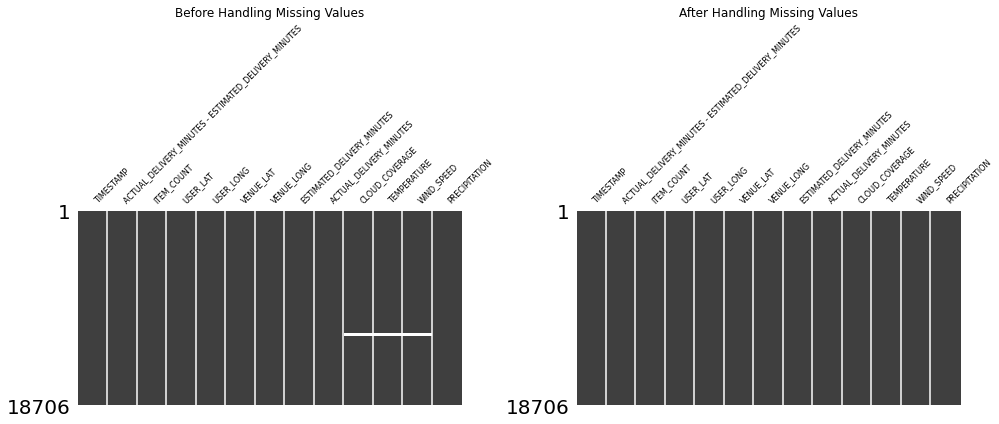

In [4]:
# Create a copy of the original data
df_orig = df.copy()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting missing values before handling
msno.matrix(df_orig, ax=axes[0], sparkline=False)
axes[0].set_title("Before Handling Missing Values")
axes[0].tick_params(axis='x', rotation=45, labelsize=8) 

# Fill  missing values in specified columns with mean
df['CLOUD_COVERAGE'].fillna(df['CLOUD_COVERAGE'].mean(), inplace=True)
df['TEMPERATURE'].fillna(df['TEMPERATURE'].mean(), inplace=True)
df['WIND_SPEED'].fillna(df['WIND_SPEED'].mean(), inplace=True)

# Plotting missing values after handling
msno.matrix(df, ax=axes[1], sort="ascending", sparkline=False)
axes[1].set_title("After Handling Missing Values")
axes[1].tick_params(axis='x', rotation=45, labelsize=8) 

plt.tight_layout()
plt.show()

## Timestamp

In [5]:
# Convert Timestamp to a datetime object
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

# Extract month, day, days_of_week, hour, week progression from TIMESTAMP
df['MONTH'] = df['TIMESTAMP'].dt.month
df['DAY'] = df['TIMESTAMP'].dt.day
df['DAYS_OF_WEEK'] = df['TIMESTAMP'].dt.dayofweek
df['HOUR_OF_DAY'] = df['TIMESTAMP'].dt.hour
df['WEEK_PROGRESSION'] = df['TIMESTAMP'].dt.strftime('%U')

# Define time categories
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply categorization to create a new 'TIME_CATEGORY' column
df['TIME_CATEGORY'] = df['HOUR_OF_DAY'].apply(categorize_time)
df.head()

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,MONTH,DAY,DAYS_OF_WEEK,HOUR_OF_DAY,WEEK_PROGRESSION,TIME_CATEGORY
0,2020-08-01 06:07:00,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0,8,1,5,6,30,Morning
1,2020-08-01 06:17:00,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0,8,1,5,6,30,Morning
2,2020-08-01 06:54:00,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0,8,1,5,6,30,Morning
3,2020-08-01 07:09:00,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0,8,1,5,7,30,Morning
4,2020-08-01 07:10:00,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0,8,1,5,7,30,Morning


## Questions
### How does the number of orders vary by day of the week?
A trend emerges in the dataset, indicating that weekends consistently have higher order volumes compared to weekdays. Friday and Wednesday has a more order activity compared to other weekdays. This pattern depicts the significance of considering both daily and weekly variations in order.

The high order counts on Fridays and Wednesdaypoints to potential correlations with specific consumer behaviors or market trends on these particular days. Understanding and leveraging these insights can not only enhance operational planning but also provide a strategic advantage in optimizing resources and marketing efforts. By integrating this understanding of weekly patterns, the predictive model can be fine-tuned to capture and capitalize on the distinct dynamics related with different weekdays.

### What is the distribution of order counts across different hours of the day?
The temporal distribution of orders exhibits a distinctive pattern, with the highest order volumes concentrated in the afternoon, particularly at 3 and 2 pm. Morning and evening periods also demonstrate substantial order activity, albeit to a slightly lesser extent. In contrast, the night experiences the lowest number of orders.

This temporal analysis not only highlights the peak order hours but also provides a understanding of daily fluctuations. By pinpointing specific timeframes with heightened order activity, this insight can inform strategic decision-making and resource allocation to optimize operational efficiency during peak periods. The identified order trends contribute valuable context for refining predictive models and aligning business strategies with the observed temporal dynamics.

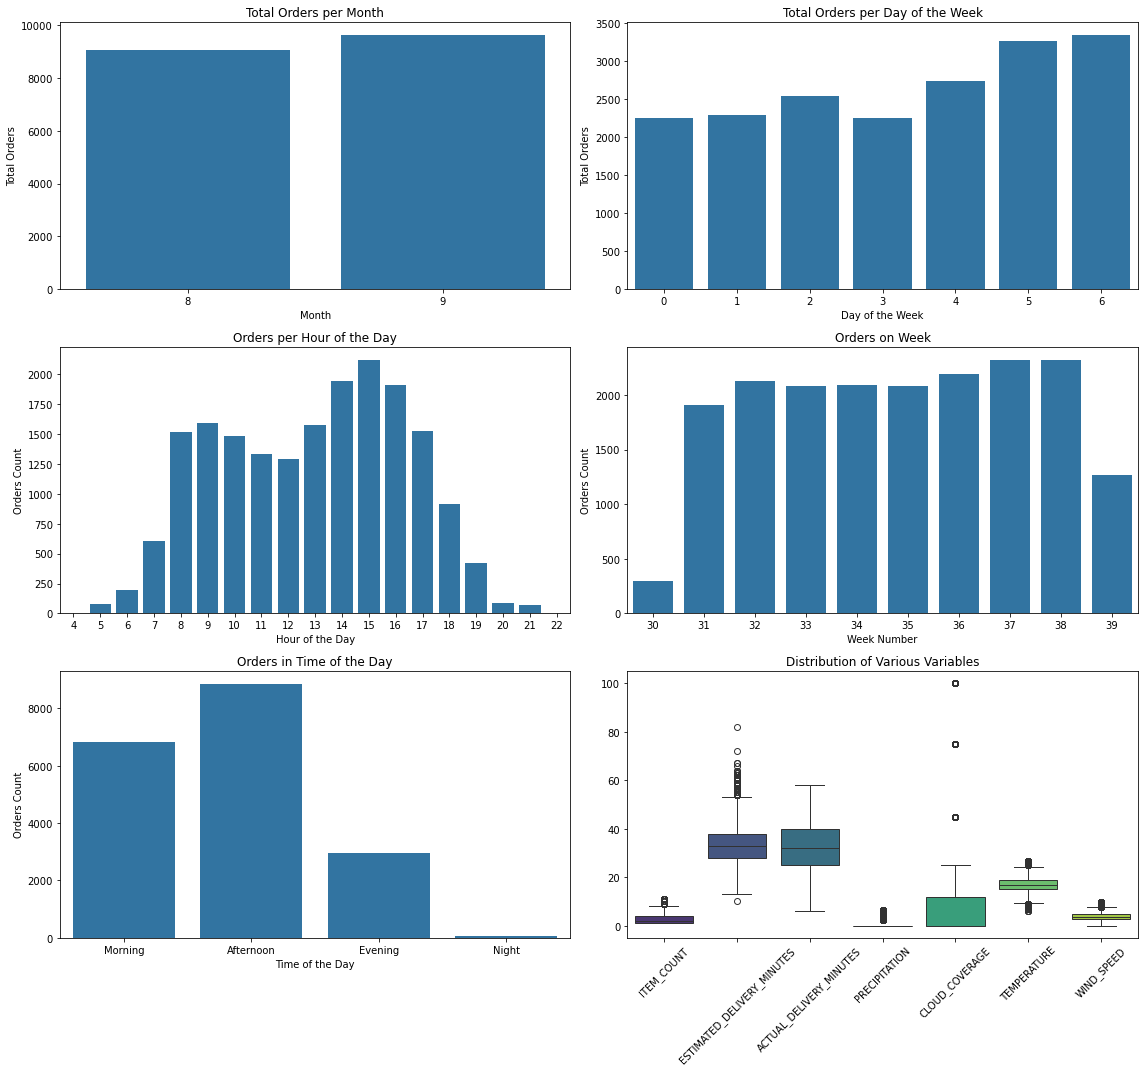

In [6]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 15))

# 1. Total orders per month - Presented as a bar plot.
sns.countplot(x='MONTH', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Total Orders per Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Orders')

# 2. Total orders per day of the week - Presented as a bar plot.
sns.countplot(x='DAYS_OF_WEEK', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Total Orders per Day of the Week')
axes[0, 1].set_xlabel('Day of the Week')
axes[0, 1].set_ylabel('Total Orders')

# 3. Orders distribution per hour of the day - Displayed using a count plot.
sns.countplot(x='HOUR_OF_DAY', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Orders per Hour of the Day')
axes[1, 0].set_xlabel('Hour of the Day')
axes[1, 0].set_ylabel('Orders Count')

# 4. Orders on week progression- Illustrated with a count plot.
sns.countplot(x='WEEK_PROGRESSION', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Orders on Week')
axes[1, 1].set_xlabel('Week Number')
axes[1, 1].set_ylabel('Orders Count')

# 5. Orders on working days vs. non-working days - Visualized through a count plot.
sns.countplot(x='TIME_CATEGORY', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Orders in Time of the Day')
axes[2, 0].set_xlabel('Time of the Day')
axes[2, 0].set_ylabel('Orders Count')

# 6. Orders across different weather situations - Depicted with a box plot.
sns.boxplot(data=df[['ITEM_COUNT', 'ESTIMATED_DELIVERY_MINUTES', 'ACTUAL_DELIVERY_MINUTES', 'PRECIPITATION', 'CLOUD_COVERAGE', 'TEMPERATURE', 'WIND_SPEED']], ax=axes[2, 1], palette='viridis')
axes[2, 1].set_title('Distribution of Various Variables')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Descriptive Statistical Analysis

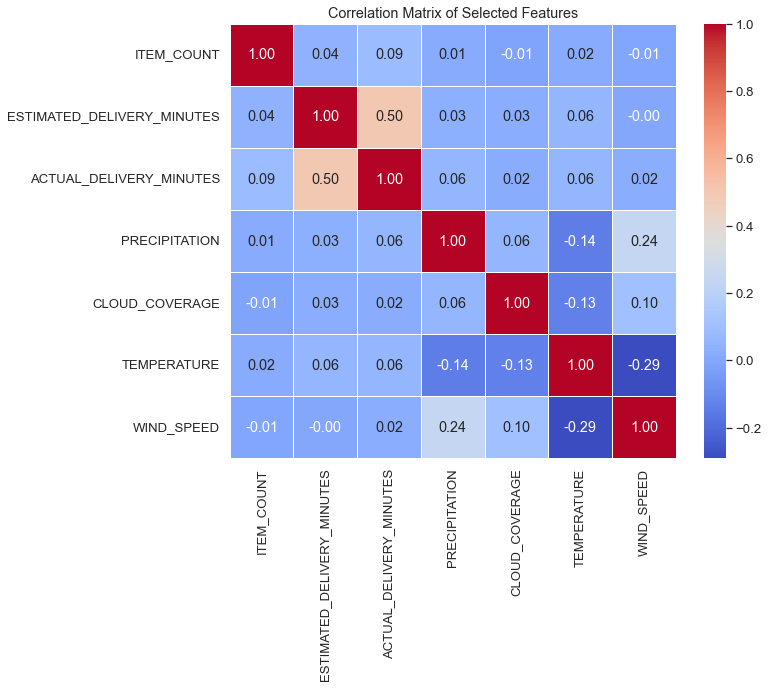


Descriptive Statistics for Selected Features:
         ITEM_COUNT  ESTIMATED_DELIVERY_MINUTES  ACTUAL_DELIVERY_MINUTES  \
count  18706.000000                18706.000000             18706.000000   
mean       2.688228                   33.809313                32.608254   
std        1.886455                    7.340283                10.018879   
min        1.000000                   10.000000                 6.000000   
25%        1.000000                   28.000000                25.000000   
50%        2.000000                   33.000000                32.000000   
75%        4.000000                   38.000000                40.000000   
max       11.000000                   82.000000                58.000000   

       PRECIPITATION  CLOUD_COVERAGE   TEMPERATURE    WIND_SPEED  
count   18706.000000    18706.000000  18706.000000  18706.000000  
mean        0.332756       11.996853     16.973536      3.790991  
std         1.129234       23.635628      3.386543      1.445195  


In [7]:
# Feature Selection
selected_features =['ITEM_COUNT','ESTIMATED_DELIVERY_MINUTES', 'ACTUAL_DELIVERY_MINUTES', 'PRECIPITATION', 'CLOUD_COVERAGE', 'TEMPERATURE', 'WIND_SPEED']
selected_data = df[selected_features]

# Descriptive Statistics
descriptive_stats = selected_data.describe()

# Inferential Statistics: Correlation matrix
correlation_matrix = selected_data.corr()

# Visualization of Correlations: Use of heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Display Descriptive Statistics
print("\nDescriptive Statistics for Selected Features:")
print(descriptive_stats)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   TIMESTAMP                                             18706 non-null  datetime64[ns]
 1   ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES  18706 non-null  int64         
 2   ITEM_COUNT                                            18706 non-null  int64         
 3   USER_LAT                                              18706 non-null  float64       
 4   USER_LONG                                             18706 non-null  float64       
 5   VENUE_LAT                                             18706 non-null  float64       
 6   VENUE_LONG                                            18706 non-null  float64       
 7   ESTIMATED_DELIVERY_MINUTES                            18706 non-null  int64 

## ARIMA Model: Daily and Weekly order prediction
ARIMA, which stands for Autoregressive Integrated Moving Average, is a powerful form of regression analysis designed for time series forecasting. It assesses the influence of a dependent variable relative to other dynamic variables. The primary goal of the ARIMA model is to predict future movements in a time series by examining the differences between values in the series rather than the actual values. I have choosen this method because it is very effective for small dataset.

The ARIMA model is particularly chosen for its proven efficacy in delivering accurate results, especially when dealing with small datasets.

The model operates through three key components:

Autoregressive (AR) Component: This captures the relationship between the current value and its past values, reflecting the serie's autocorrelation.
Integrated (I) Component: This involves differencing the series to achieve stationarity, ensuring a stable mean and variance over time.
Moving Average (MA) Component: This considers the relationship between the current value and past forecast errors, capturing the short-term fluctuations

The initial steps involved creating a dataset representing the mean daily order counts. A stationary test was conducted, revealing a p-value of 0.67, indicating the need for differencing in the model. Additionally, the data exhibited seasonality.

Subsequently, the dataset was split into training and test sets. To determine the appropriate order for the model, the Minimum AIC score metric was employed. The model was then trained on the training data. For evaluation, the model's performance was assessed using the testing data, employing the Root Mean Squared Error (RMSE) metric.

This approach follows a systematic process, addressing stationarity, seasonality, and optimal parameter selection, to build and evaluate a predictive model for mean daily order counts.


In [9]:
import statsmodels.api as sm
from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Set 'timestamp' as the DataFrame index
df.set_index('TIMESTAMP', inplace=True)

In [11]:
# Resample the data to hourly frequency and sum the 'ITEM_COUNT' values
df_hourly = df['ITEM_COUNT'].resample('H').count()
df_daily =  df_hourly.resample('D').mean()

<function matplotlib.pyplot.show(close=None, block=None)>

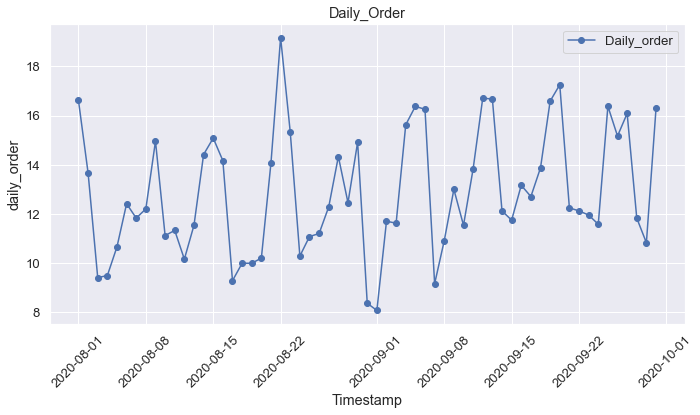

In [12]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_daily, label='Daily_order', marker='o', linestyle='-')

# Customize the plot
plt.title('Daily_Order')
plt.xlabel('Timestamp')
plt.ylabel('daily_order')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show

ADF Statistic: -1.2002706955597688
p-value: 0.6734792546980382


<Figure size 1080x504 with 0 Axes>

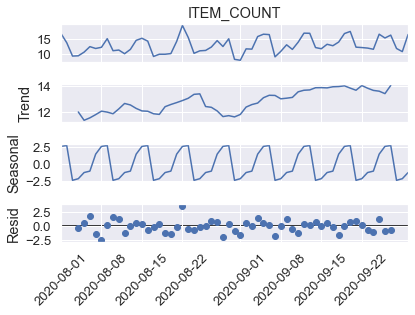

In [13]:
# Checking Stationarity
result = adfuller(df_daily)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

plt.figure(figsize=[15,7])
seasonal_decompose(df_daily).plot()
plt.xticks(rotation=45)
plt.show()

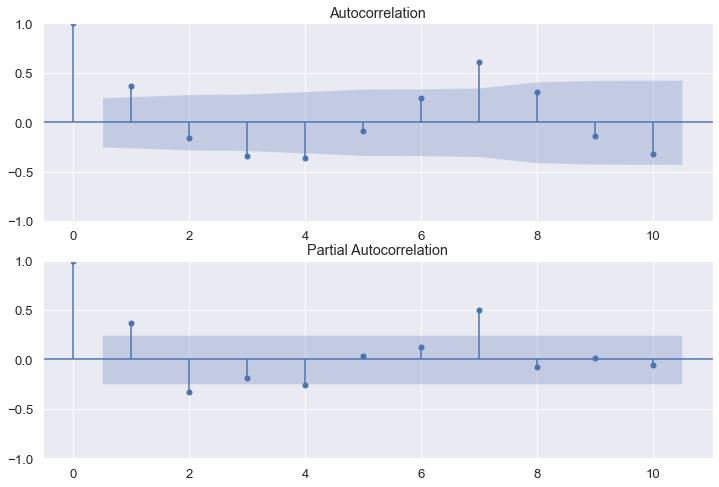

In [14]:
# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_daily, lags=10, ax=ax1)
plot_pacf(df_daily, lags=10, ax=ax2)
plt.show()

In [15]:
# Set the split percentage
split_percentage = 0.80

# Calculate the split index
split_index = int(len(df_daily) * split_percentage)

# Splitting into training and testing sets
train_data = df_daily[:split_index]
test_data = df_daily[split_index:]

# Print the lengths of training and testing sets
print("Training set length:", len(train_data))
print("Testing set length:", len(test_data))

Training set length: 48
Testing set length: 13


In [16]:
from itertools import product
import statsmodels.api as sm
import warnings

# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D = 1
d = 1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    try:
        # Define and fit the SARIMAX model
        model = sm.tsa.statespace.SARIMAX(train_data, 
                                          order=(param[0], d, param[1]), 
                                          seasonal_order=(param[2], D, param[3], 12),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        # Skip if the parameters are invalid
        print('Invalid parameters:', param)
        continue

    # Store the AIC of the model
    aic = model.aic

    # Update the best model and parameters if the current model is better
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param

    # Append the current parameter and AIC to the results list
    results.append([param, model.aic])

# Print the best parameters and AIC
print(f'Best Model: {best_model.summary()}')
print(f'Best Parameters: {best_param}')

Best Model:                                       SARIMAX Results                                      
Dep. Variable:                          ITEM_COUNT   No. Observations:                   48
Model:             SARIMAX(2, 1, 1)x(2, 1, [], 12)   Log Likelihood                 -18.236
Date:                             Wed, 31 Jan 2024   AIC                             48.472
Time:                                     22:18:38   BIC                             49.656
Sample:                                 08-01-2020   HQIC                            45.919
                                      - 09-17-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2584      0.324     -0.798      0.425      -0.893       0.376
ar.L2         -

In [17]:
# Making Predictions in Test Set
prediction = best_model.predict(start=test_data.index[0], end=test_data.index[-1])
print(prediction)

2020-09-18    13.901416
2020-09-19    17.028181
2020-09-20    17.614605
2020-09-21    15.579509
2020-09-22    10.173131
2020-09-23    10.603454
2020-09-24    13.603958
2020-09-25    13.905840
2020-09-26    16.630792
2020-09-27    22.968572
2020-09-28    16.716607
2020-09-29    10.047055
2020-09-30    11.308793
Freq: D, Name: predicted_mean, dtype: float64


In [18]:
# Root mean squared error
rmse_daily = sqrt(mean_squared_error(prediction, test_data))
print(rmse_daily)

3.113578562187011


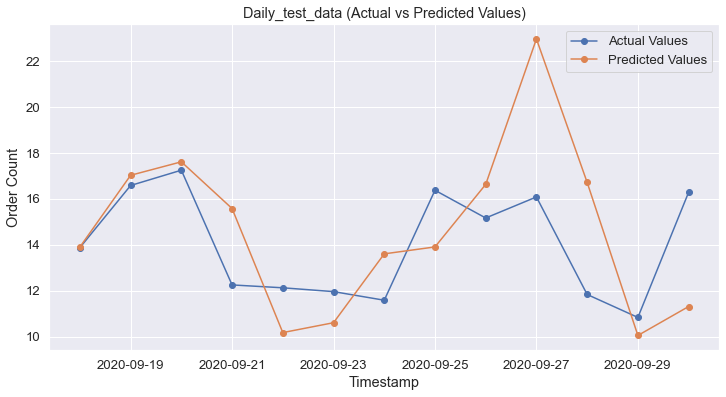

In [19]:
# Plotting actual mean daily order vs predicted daily order
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual Values', marker='o')
plt.plot(prediction, label='Predicted Values', marker='o')
plt.title('Daily_test_data (Actual vs Predicted Values)')
plt.xlabel('Timestamp')
plt.ylabel('Order Count')
plt.legend()
plt.show()

In [20]:
# Weekly Predictions

In [21]:
X_train_weekly = train_data.resample('W').sum()
X_test_weekly = test_data.resample('W').sum()
predicted_weekly = prediction.resample('W').sum()

In [22]:
rmse_weekly = sqrt(mean_squared_error(predicted_weekly, X_test_weekly))
print(rmse_weekly )

4.628038099584507


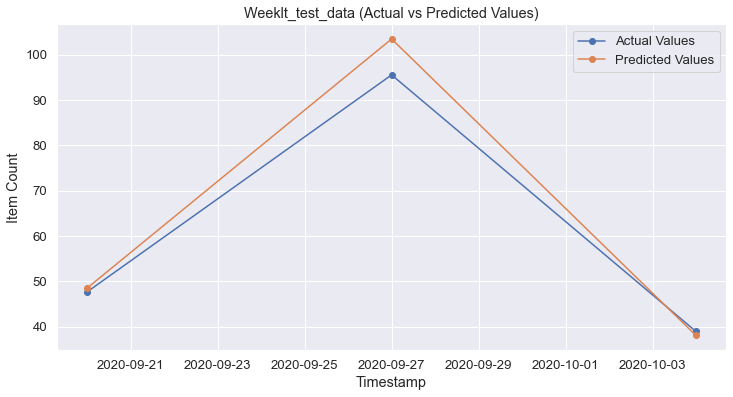

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(X_test_weekly, label='Actual Values', marker='o')
plt.plot(predicted_weekly, label='Predicted Values', marker='o')
plt.title('Weeklt_test_data (Actual vs Predicted Values)')
plt.xlabel('Timestamp')
plt.ylabel('Item Count')
plt.legend()
plt.show()

# Conclusion`
Our dataset uncovered valuable insights into the temporal patterns of order counts, highlighting distinct variations across hours, days of the week, and weeks. Moreover, afternoons and weekdays emerged as peak times for order activity.

The implemented ARIMA modelwas effective in capturing the patterns of order counts in the dataset. The model's performance was evaluated using Root Mean Squared Error (RMSE), resulting in satisfactory metrics of 3.11 for daily predictions and 4.62 for weekly predictions.

In summary, the ARIMA model serves as a robust tool for predicting order counts at different time intervals. This project provides a solid foundation for future enhancements and exploration of advanced forecasting techniques. The ultimate goal is to improve predictive accuracy and facilitate informed decision-making in order flow management in Wolt.

# MY Background and Wolt
Through my academic journey and practical work, I've developed a keen interest in leveraging data analytics and natural language processing (NLP) to derive meaningful insights and solve real-world problems. The challenges I find most intriguing revolve around the intersection of technology and language, particularly in the field of NLP.

I am currently in the process of identifying a thesis topic, and I am excited about the prospect of aligning it with the needs and goals of forward-thinking companies like Wolt. While I don't have specific prior coursework directly related to the challenges faced by Wolt, my academic background equips me with a solid foundation in analytics, which I believe is transferrable and adaptable to various domains.

Having followed Wolt's growth and impact, I am drawn to the challenges in optimizing and enhancing user experiences, particularly in the context of food delivery and logistics. I am eager to apply my skills in data analysis, predictive modeling, and NLP to contribute to the optimization of Wolt's operations and customer interactions.

In terms of relevant minors and side projects, I have actively engaged in coursework and projects that involve NLP, sentiment analysis, and the application of machine learning algorithms to textual data. These experiences have not only enhanced my technical skills but have also fostered a deep appreciation for the practical implications of these technologies. Moreover, my GitHub repository helps to show my competence, showcasing not only my hands-on experience but also my commitment to continuous learning and effective problem-solving capabilities. My projects include a Bike Rental project and a Recipe Selection project. These endeavors showcase my ability to tackle real-world challenges at Wolt, demonstrating a combination of technical proficiency and an understanding of practical applications. 

In summary, my ambition is to bring a fresh perspective and innovative solutions to challenges at the intersection of data analytics, NLP, and user experience. I am excited about the opportunity to apply my knowledge and skills in a dynamic and impactful environment like Wolt, contributing to the ongoing success and innovation of the company.